In [ ]:
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
boston = datasets.load_boston(return_X_y=False)
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
df = pd.DataFrame(boston['data'], columns=boston.feature_names)
nfeatures = len(df.columns)
df['MEDV'] = boston.target

In [ ]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
df.shape

(506, 14)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
for c in df.columns:
    df[c] = (df[c] - df[c].min())/(df[c].max() - df[c].min()) #min-max-normalization
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.000000,0.18,0.067815,0.0,0.314815,0.577505,0.641607,0.269203,0.000000,0.208015,0.287234,1.000000,0.089680,0.422222
1,0.000236,0.00,0.242302,0.0,0.172840,0.547998,0.782698,0.348962,0.043478,0.104962,0.553191,1.000000,0.204470,0.368889
2,0.000236,0.00,0.242302,0.0,0.172840,0.694386,0.599382,0.348962,0.043478,0.104962,0.553191,0.989737,0.063466,0.660000
3,0.000293,0.00,0.063050,0.0,0.150206,0.658555,0.441813,0.448545,0.086957,0.066794,0.648936,0.994276,0.033389,0.631111
4,0.000705,0.00,0.063050,0.0,0.150206,0.687105,0.528321,0.448545,0.086957,0.066794,0.648936,1.000000,0.099338,0.693333


In [ ]:
def split_data(df, val_size, test_size):
   df = df.sample(frac=1)
   n = len(df)
   train_size = int((1-val_size-test_size)*n)
   val_size = int(n*val_size)  
   test_size = int(n*test_size)

   return df[:train_size], df[train_size:train_size+val_size], df[train_size+val_size:]

In [ ]:
train, val, test = split_data(df, 0.1, 0.6)

In [ ]:
train_X, train_y = train.drop(['MEDV'], axis=1), train['MEDV']
val_X, val_y = val.drop(['MEDV'], axis=1), val['MEDV']
test_X, test_y = test.drop(['MEDV'], axis=1), test['MEDV']

In [ ]:
def MSE(actual_y, hyp_y): 
    s = float(0)
    for i in range(len(hyp_y)):
        s += (hyp_y[i] - actual_y[i])**2
    s /= float(len(hyp_y))
    return s

# y = w0 + w1x1 + w2x2 + ....


In [ ]:
class LinearRegression:
    def __init__(self, lr, n_features, randomIni=False):
        if randomIni:
            self.weights = [np.random.rand() for i in range(n_features)]
            self.bias = np.random.rand()
        else:
            self.weights = np.ones(shape=(1, n_features))
            self.bias = 1
        self.lr = lr
        self.train_mse = []

    def predict(self, x):
        preds = []
        for i in range(len(x)):
            y = (np.dot(self.weights, x[i]) + self.bias).item()
            preds.append(y)
        return np.array(preds)


    def learn(self, df, epochs):
        for i in range(epochs):
            random_sample = df.sample()
            x = np.asarray(random_sample.drop(['MEDV'], axis=1))
            y = np.asarray(random_sample['MEDV'])
            h = self.predict(x)
            mse = MSE(y, h)
            self.train_mse.append(mse)
            # print(f"train MSE at epoch {i} = {mse}")
            size = len(x)
            w_grad = np.zeros(shape=(1,df.shape[1]-1))
            b_grad = 0
            w_grad += (x[0]*(h[0] - y[0]))
            b_grad += ((h[0] - y[0]))
            self.weights -= self.lr * 2 * w_grad
            self.bias -= self.lr * 2 * b_grad

In [ ]:
hyperparams = {
    'lr': [0.1, 0.01, 0.02, 0.03, 0.001],
    'epochs': [10, 20, 30, 40, 50],
    'rho' : [0.5, 0.6, 0.7, 0.8, 0.9]
}

In [ ]:
mses = []
for i in range(len(hyperparams['lr'])):
    model = LinearRegression(hyperparams['lr'][i], nfeatures, True)
    model.learn(train, hyperparams['epochs'][i])
    val_p = model.predict(np.asarray(val_X))
    mse = MSE(np.asarray(val_y), val_p)
    mses.append(mse)
    print(f"lr={hyperparams['lr'][i]}, {hyperparams['epochs'][i]} epochs, mse = {mse}")

lr=0.1, 10 epochs, mse = 0.27373537552215194
lr=0.01, 20 epochs, mse = 0.4447903582954331
lr=0.02, 30 epochs, mse = 0.11847556076215421
lr=0.03, 40 epochs, mse = 0.1235881376254731
lr=0.001, 50 epochs, mse = 4.674988580944498


In [ ]:
mses

[0.27373537552215194,
 0.4447903582954331,
 0.11847556076215421,
 0.1235881376254731,
 4.674988580944498]

In [ ]:
min_mse = min(mses)
best_features = mses.index(min_mse)
best_lr, best_epochs = hyperparams['lr'][best_features], hyperparams['epochs'][best_features]

model = LinearRegression(best_lr, nfeatures, True)
model.learn(train, best_epochs)

train_p = model.predict(np.asarray(train_X))
val_p = model.predict(np.asarray(val_X))
test_p = model.predict(np.asarray(test_X))

train_mse = MSE(np.asarray(train_y), train_p)
val_mse = MSE(np.asarray(val_y), val_p)
test_mse = MSE(np.asarray(test_y), test_p)

print(f"model(lr:{best_lr}, no. of epochs:{best_epochs})")
print("MSE for:")
print("train:", train_mse)
print("val:", val_mse)
print("test:", test_mse)

model(lr:0.02, no. of epochs:30)
MSE for:
train: 0.12264579644809816
val: 0.11768851503688435
test: 0.1107510824914443


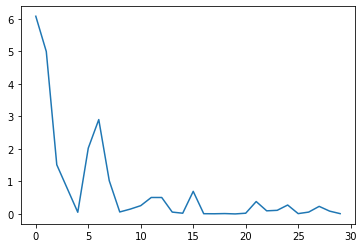

In [ ]:
plot_mses = model.train_mse
plot_epochs = [i for i in range(best_epochs)]
plt.plot(plot_epochs, plot_mses)